First some key terms:

- **perceptron**
  - basic neuron using a step function
  
- **tensor**
  - contains weights for each layer
  - Vectors are 1-dimensional, matrices 2-dimensional, and tensors n-dimensional. 

- **layer**
  - in simple terms it calculates `sigmoid(dot(weight, inputs))` for each layer
  - The `sigmoid` is the activation function while the `dot(weight, inputs)` is the linear layer
  - the *linear layer* contains weights and biases
  - also known as a *dense layer* in Keras, a linear layer refers to a fully connected layer 
  - it relays the input dimensions (10 in the example below) to the output dimensions (4)

- **initiatialision scheme**
  - weights are initialised with a random value for each weight. 
    - The book discusses Random Uniform (`random.random()`), Standard Normal, and the *Xavier initialisation*
  - This as well as the activation function is specified in the *add layer* method

- **activation**
  - The book started with a `sigmoid`, then used a `tanh` (hyperbolic tangent). More popular is `Relu` (Rectified Linear Unit), a type of activation function that introduces non-linearity, $f(x) = max(0, x)$.
  - `Softmax` translates weights to a probability that sums up as 1.
  - `Cross-entropy` (sometimes `neg log likelihood`) takes the probabilities and minimises the loss, similar to the `least squares sum` in lin reg. It is a loss function often used in conjunction with softmax activation in the output layer of a neural network model. The purpose of the cross-entropy loss function is to measure the dissimilarity between the predicted probability distribution and the true distribution. In other words, it's a measure of how well the model's predicted probabilities match the true labels.

- **optimisation**
  - this is where the loss function is optimised and the weights (params) are updated
  - it takes the gradient step
  - The optimizer is the specific implementation of the gradient descent algorithm. 
  - There are many algorithms for this: the `Adam` Optimizer stands for ADAptive with Momentum. It is considered the best-practice optimizer
  
- **Feed-forward and backpropagation**  
  
- **Dropout**
  - To avoid overfitting: a kind of regularisation
  - randomly turns of each neuron during training


Let's solve the FizzBuzz problem using a simple neural network with **Keras**. The FizzBuzz problem is a common programming task, often used in coding interviews. The task is to print the numbers from 1 to 100, but for multiples of 3 print "Fizz" instead of the number, and for multiples of 5 print "Buzz". For numbers which are multiples of both 3 and 5 print "FizzBuzz".

First, we need to generate the training data. We'll represent each number as a binary string, and each output as a one-hot encoded vector.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

# Function to convert a number to a binary string
def binary_encode(i, num_digits):
    return np.array([i >> d & 1 for d in range(num_digits)])

In [2]:
[binary_encode(i,10) for i in range(10)]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])]

Note: `i >> d` is a bitwise right shift operation. It moves the bits of i d steps to the right.

In [3]:
# Function to convert an output to one-hot encoding
def fizz_buzz_encode(i):
    if   i % 15 == 0: return np.array([0, 0, 0, 1]) # these are the 4D vectors we want to output
    elif i % 5  == 0: return np.array([0, 0, 1, 0])
    elif i % 3  == 0: return np.array([0, 1, 0, 0])
    else:             return np.array([1, 0, 0, 0])

In [4]:
# Generate training data
NUM_DIGITS = 10
trX = np.array([binary_encode(i, NUM_DIGITS) for i in range(101, 2 ** NUM_DIGITS)])
trY = np.array([fizz_buzz_encode(i) for i in range(101, 2 ** NUM_DIGITS)])

So, trX is a numpy array where each element is the binary representation of a number from 101 to `2 ** NUM_DIGITS - 1`.

In [5]:
trX[0]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [6]:
trX.shape

(923, 10)

In [7]:
trY[0]

array([1, 0, 0, 0])

## Compile and fit the model

note how it lands at 0.53 and doesn't get passed that.

I tried 
```python
from keras.optimizers import RMSprop
# and then pass this to compile:
... optimizer=RMSprop(learning_rate=0.05)
```

What really broke trough the ceiling was

- making the first layer `64` or `128`
- adding `shuffle=True`: the book suggested randomising the sequence. The shuffle does this for each batch. 


In [63]:
model = Sequential([Dense(64, activation='relu'),
                    Dropout(0.2),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics='accuracy')

history = model.fit(trX, trY, epochs=500, batch_size=64, shuffle=True)

Epoch 1/500
15/15 [==============================] - 1s 2ms/step - loss: 1.2587 - accuracy: 0.4626
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1605 - accuracy: 0.5341
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1599 - accuracy: 0.5309
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1415 - accuracy: 0.5330
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1458 - accuracy: 0.5341
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1516 - accuracy: 0.5352
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1445 - accuracy: 0.5330
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1498 - accuracy: 0.5330
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1448 - accuracy: 0.5341
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1472 - accuracy: 0.5341
Epoch 11/

`model.add(Dense(64)` adds the first Dense layer with **64 neurons**.

The **initialisazer** `Glorot uniform` is Xavier uniform. see https://www.tensorflow.org/api_docs/python/tf/keras/initializers

In the final layer, the `softmax` **activation function** is used to ensure the output values are probabilities that sum to 1, which is a common choice for multi-class classification problems. This works best with cross entropy in the optimizer. 

RMSprop and Adam are basically momentum. See 
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

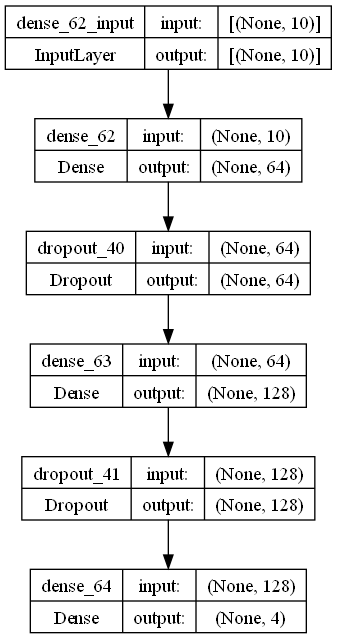

In [53]:
from keras import utils

utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [54]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 64)                704       
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 128)               8320      
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_64 (Dense)            (None, 4)                 516       
                                                                 
Total params: 9,540
Trainable params: 9,540
Non-trainable params: 0
_________________________________________________________________


Using the `history.history` thanks to naming the `model.fit` function

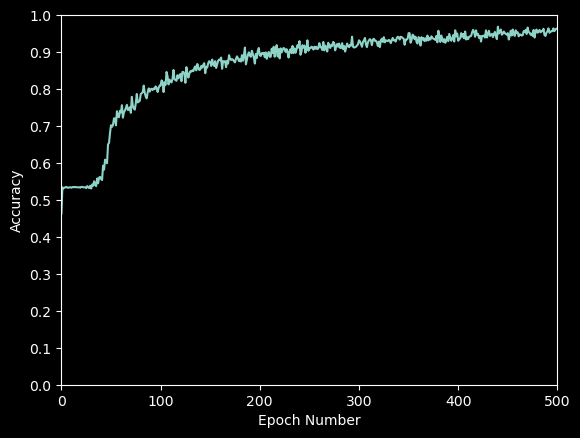

In [64]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.axis([0,500,0,1])
plt.yticks([0.1*i for i in range(11)])
plt.plot(history.history['accuracy'])

In [65]:
# Function to convert the model's output to a human-readable string
def fizz_buzz(i, prediction):
    return [str(i), "Fizz", "Buzz", "FizzBuzz"][prediction]

This is an interesting function:
the first list `[str(i), "Fizz", "Buzz", "FizzBuzz"]` is selected by the index `[prediction]`

In [66]:
fizz_buzz(5,3)

'FizzBuzz'

## The reason it doesn't work: 

the loss remains high

the `model.predict(teX)` outputs are always giving a highest value for the *first* column (index 0).     

That's also why teY gives only 0s. 

In [70]:
model.predict(trX)

29/29 [==============================] - 0s 962us/step


array([[9.6158779e-01, 1.1133633e-03, 3.7298799e-02, 3.7284367e-10],
       [9.9218798e-01, 1.2716632e-03, 6.5298784e-03, 1.0466104e-05],
       [2.2540843e-02, 4.3395336e-04, 9.7696757e-01, 5.7669618e-05],
       ...,
       [9.9851149e-01, 8.6851721e-04, 6.1996555e-04, 1.5338887e-09],
       [9.9989426e-01, 6.4588996e-05, 3.2742413e-05, 8.3160539e-06],
       [9.8632741e-01, 1.2293887e-02, 1.3625025e-03, 1.6253685e-05]],
      dtype=float32)

In [71]:
# Test the model on the numbers 1 to 100
numbers = np.arange(1, 101)
teX = np.transpose(binary_encode(numbers, NUM_DIGITS))
teY = model.predict(teX).argmax(axis=-1)  # Use argmax to get the class with the highest probability

4/4 [==============================] - 0s 1ms/step


In [ ]:
teY = np.array([0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3])

In [72]:
predictions = np.vectorize(fizz_buzz)(numbers, teY) # this applies the function on (numbers, teY)

print("\n".join(predictions))

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
20
Fizz
22
23
Fizz
25
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
Buzz
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
80
81
82
83
84
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


In [73]:
teY

array([0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0,
       3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1,
       0, 2, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2], dtype=int64)

# MNIST image recognition

In [ ]:
import tensorflow as tf
from keras.datasets import mnist

In [ ]:
mnist.temporary_dir = '/tmp'

In [ ]:
mnist.load_data()

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, 10)

for i in range(10):
    for j in range(10):
        # Plot each image in black and white and hide the axes.
        ax[i][j].imshow(x_train[10 * i + j], cmap='Greys')
        ax[i][j].xaxis.set_visible(False)
        ax[i][j].yaxis.set_visible(False)

# plt.show()

In [ ]:
# to show the pixels in rows and columns

plt.imshow(x_train[0], cmap='Greys')

In [ ]:
y_train[0]

In [ ]:
# to show the pixel representation of the image in a matrix

x_train[0]

In [ ]:
x_train.shape

In [ ]:
# Reshape the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

The line `x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)` is reshaping the training data to be in the format that the Convolutional Neural Network (CNN) expects.

When you initially load the MNIST data, each image is a 28x28 array of pixel intensities. However, Keras' Convolutional layers expect input data to have an additional dimension that represents the number of *color channels* in the image.

For color images, this would be 3 (for red, green, and blue channels), but for MNIST, which is grayscale, there is only 1 color channel. So we reshape the 28x28 images into 28x28x1 tensors to add an explicit single color channel.

In [ ]:
x_train.shape

In [ ]:
# Normalize the pixel values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

pixel values are stored as 8-bit integers from 0 (black) to 255 (white). We want them from 0 to 1.

the book also normalises them in the sense of averaging them at 0 (by subtracting the average from each). I reckon this is done in `model.add(flatten())` below.

In [ ]:
# Convert class vectors to binary class matrices 
# the book one-hot-encodes

from keras import utils

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
y_train.shape

In [ ]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta    # which is a form of stochastic gradient descent

model.compile(loss=categorical_crossentropy, 
              optimizer=Adadelta(), 
              metrics=['accuracy'])

For CNNs: convolutional neural networks: https://cs231n.github.io/convolutional-networks/

The `conv2D` layer consists of filters instead of neurons. 

The CONV layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as [32x32x12] if we decided to use 12 filters.

Since all neurons in a depth slice are sharing weights, each depth slice can be computed as a **convolution** of the neuron’s weights with the input volume. This is why it is common to refer to the sets of weights as a **filter** (or a **kernel**), that is convolved with the input. The `kernel_size` is the size of the pixel window.

The POOL layer will perform a downsampling operation along the spatial dimensions (width, height). It is common to periodically insert a Pooling layer in-between successive Conv layers in a ConvNet architecture. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. The most common form is a pooling layer with filters of `size 2x2` applied with a `stride of 2` downsamples every depth slice. Most common is `MaxPooling2D`, where each max is taken over a little 2x2 square.

Repeated Conv layers do away with pooling.

Note: convolution = kronkeling; kernel = pit, kern.

**Warning** this takes a while:

In [ ]:
# Train the model
History = model.fit(x_train, y_train, batch_size=128, epochs=3, verbose=1, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

83%. Not bad!

I named the fit method. It returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. 

When you train a model in Keras using the fit method, it returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training.

The History object holds the record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(History.history['loss'])

In [ ]:
History.history

## To save the trained model with its parameters

This will save the architecture of the model, the model's weights, the training configuration (loss, optimizer), and the state of the optimizer, allowing you to resume training exactly where you left off.

In [ ]:
model.save('image_recogn.h5')

In [ ]:
from keras.models import load_model

# Load the model
new_model = load_model('image_recogn.h5')

# Verify its architecture
new_model.summary()

The summary shows the parameters. Per layer there's a .get_weights() method, but that requires naming the layers.